# Central Limit Theorem and Testing Normality

###### Moss Landing Marine Labs, MS263

## Part 1: Central Limit Theorem

The central limit theorem states that, even for non-normally distributed parent populations, the mean of the sample means from many iterations of sampling will be normally distributed if the sample size is great enough.

Let's say we sample a random variable $x$ with true mean $\mu$ and true variance $\sigma^2$ whose true distribution is not normal. We do many, many experiments with $N$ samples. The parent population $x$ can be non-normal, but the distribution of sample means ($\bar{x}$) will have a  normal distribution for large $N$. 

The mean of the distribution of sample means approaches the true mean $\mu$ as N increases.

The standard deviation $s_e$ of the distribution of sample means approaches $\sigma/\sqrt{N}$ as $N$ increases. This is called the standard error. This is different from the standard deviation of the parent population; the standard error decreases as the sample size increases.

First, import Python libraries. The scipy.stats module has a number of useful probablity distribution functions. The Weibull distribution is usefull for this demonstration because it is highly skewed.

In [1]:
%matplotlib notebook 
import numpy as np   # basic mathematical functions
from scipy import stats      # functions for obtaining properties of different PDFs
from matplotlib import pyplot as plt       # plotting library

We start by defining the number of samples per experiment, the number of repeat experiments (collection of samples randomly generated from a distribution) and a shape parameter that defines how skewed the distribution is.

In [2]:
N = 100              # Number of samples
expts = 500         # Number of repeat experiments, each with N samples
c = 1                # shape parameter for Weibull distribution

This plot shows that the distribution of the parent population is highly skewed.

<IPython.core.display.Javascript object>


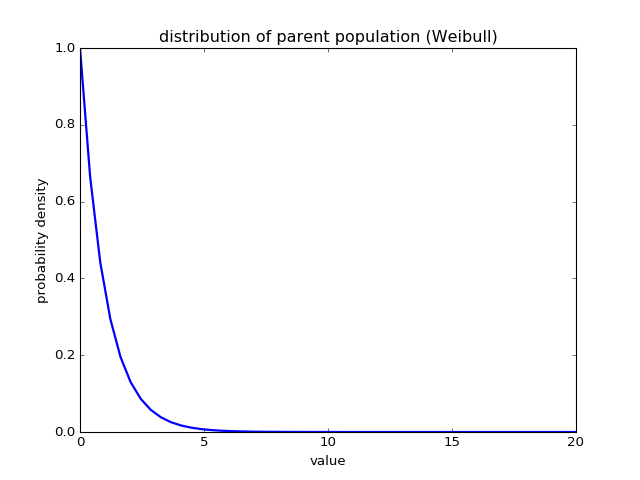

In [3]:
x = np.linspace(0,20)
plt.plot(x, stats.weibull_min.pdf(x, c),linewidth=2)
plt.title('distribution of parent population (Weibull)')
plt.xlabel('value')
plt.ylabel('probability density')

Generate random samples. Save all samples for each experiment. This gives a 2D array with `expt` rows and `N` columns.

In [4]:
# initialize variables
mn = np.nan*np.zeros((expts,N))
# use a for loop to do all experiments
for ii in np.arange(0,expts):
    samples = stats.weibull_min.rvs(c,size=N)     # Generate random samples
    for jj in np.arange(0,N):
        mn[ii,jj] = np.mean(samples[0:jj])            # sample mean

/Users/tomconnolly/programs/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/tomconnolly/programs/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Show the distribution of the means of the experiment. In the top plot, each experiment has $N=2$ samples. In the bottom plot, each experiment has N=100 samples.

<IPython.core.display.Javascript object>


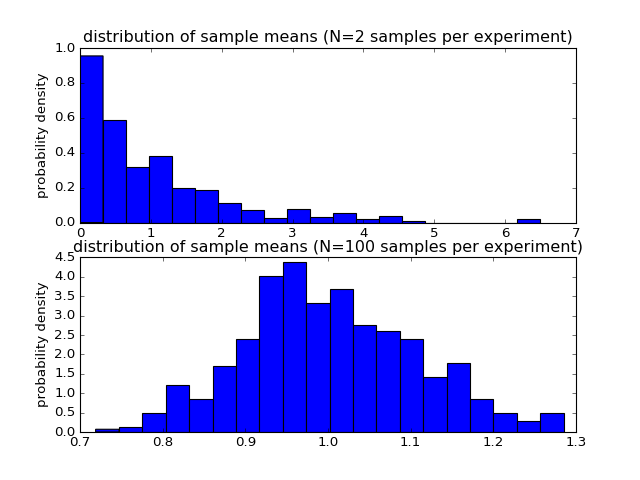

In [5]:
nbins = 20 # number of bins to plot in the histograms

plt.figure() # make a new figure

plt.subplot(211) # start making top panel
plt.hist(mn[:,1],20,normed=True)        # make a normalized histogram
plt.title('distribution of sample means (N=2 samples per experiment)')
plt.ylabel('probability density')

plt.subplot(212) # start making bottom panel
plt.hist(mn[:,99],20,normed=True)        # make a normalized histogram
plt.title('distribution of sample means (N=100 samples per experiment)')
plt.ylabel('probability density')

## Part 2: Testing Normality

Is the bottom panel really a normal distribution? One way to check is to plot the histogram and a normal distribution with the same mean and standard deviation.

<IPython.core.display.Javascript object>


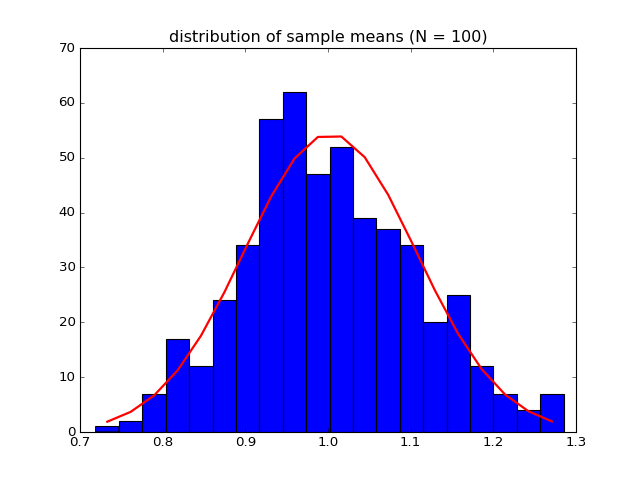

In [6]:
# Calculate mean and standard deviation of the distrubutions shown above
# (N = 2 and N = 50 cases)
mnmn2 = np.mean(mn[:,1])
smn2 = np.std(mn[:,1])
mnmn50 = np.mean(mn[:,99])
smn50 = np.std(mn[:,99])

# Number of bins to plot in the histograms
nbins = 20

# Calculate observed and expected frequency (N = 2 case)
f_obs2, bins2 = np.histogram(mn[:,1],nbins)   # observed frequency, and edges of the bins
bincen2 = 0.5*(bins2[0:-1]+bins2[1:])         # values at the center of the bins
binwidth2 = bins2[2]-bins2[1]                 # width of the bins
# expected frequencies (normal distribution, scaled according to number of samples and width of bins)
f_exp2 = stats.norm.pdf(bincen2,mnmn2,smn2)*len(mn[:,1])*binwidth2

# Calculate observed and expected frequency (N = 50 case)
# Plot the results for this case using plt.hist function
plt.figure()
f_obs50, bins50, patches = plt.hist(mn[:,99],nbins) 
bincen50 = 0.5*(bins50[0:-1]+bins50[1:])
binwidth50 = bins50[2]-bins50[1]
f_exp50 = stats.norm.pdf(bincen50,mnmn50,smn50)*len(mn[:,99])*binwidth50
plt.plot(bincen50, f_exp50,'r-',linewidth=2)
plt.title('distribution of sample means (N = 100)')

Looks pretty good, but is there a quantitative test? A chi-squared type variable is often used to test the observed frequency of occurence of different categories with a theoretical distribution.

$X^2 = \sum_{i=1}^{K}\frac{(O_i-E_i)^2}{E_i}$

$O_i$ is the observed frequency (from the histogram) and $E_i$ is the expected frequency (a normal distribution). $K$ is the number of bins in the histogram. There are $\nu = K-2$ degrees of freedom in this test since the theoretical distribution is scaled by the observed mean and variance (so there are $K-2$ independent pieces of information that can be compared in the observed and theoretical distributions).

This calculated statistic can be compared with $\chi^2_{\nu,F}$ (see Emery and Thomson, Appendix D.2.) to test the hypothesis that distribution is normally distributed. If the calculated $X^2$ is lower than the critical value for $F=0.95$, we can accept with >95% confidence he null hypothesis that observed distribution is described by a normal distribution (we have $\lt$5% chance of being wrong). 

In [7]:
df = nbins-2
chi2_2 = stats.chisquare(f_obs2,f_exp2,ddof=1)
chi2_50 = stats.chisquare(f_obs50,f_exp50,ddof=1)
print('degrees of freedom = '+str(df))
print('2 samples/experiment (top panel): chi2 = '+str(chi2_2[0])
      +', critical value (95%) = '+str(stats.chi2.ppf(0.95,df)))
print('50 samples/experiment (bottom panel): chi2 = '+str(chi2_50[0])
     +', critical value (95%) = '+str(stats.chi2.ppf(0.95,df)))

degrees of freedom = 18
2 samples/experiment (top panel): chi2 = 33491.3977309, critical value (95%) = 28.8692994304
50 samples/experiment (bottom panel): chi2 = 35.3048252247, critical value (95%) = 28.8692994304


Plotting the observed and expected values against each other also gives a sense of whether the normal distribution is a good model for the observed distribution.

<IPython.core.display.Javascript object>


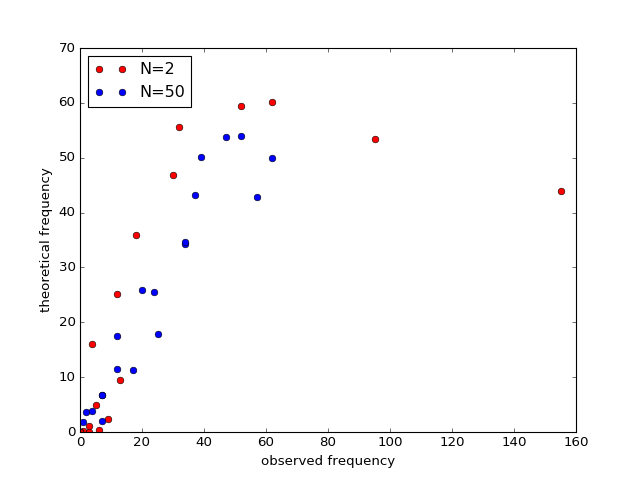

In [8]:
plt.figure()
plt.plot(f_obs2,f_exp2,'ro')
plt.plot(f_obs50,f_exp50,'bo')
plt.legend(['N=2','N=50'],loc='upper left')
plt.xlabel('observed frequency')
plt.ylabel('theoretical frequency')

The chi-square test is probably the most popular test for normality, but it is not the only one. It should not replace looking at the histograms or visualizing the data in other ways such as the plot above. If there are a large number of values in the histogram (experiments in this case), then the test can be very sensitive to small departures from normality.

One common way to quickly check for normality is a probability plot. On the x-axis are quantiles. These are the z-values that would occur if the normal distribution were sliced into parts of equal area. On the y-axis are the values sorted in order.

<IPython.core.display.Javascript object>


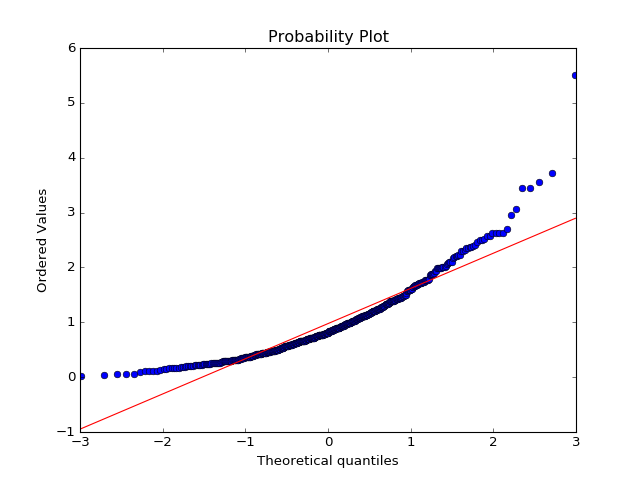

<IPython.core.display.Javascript object>


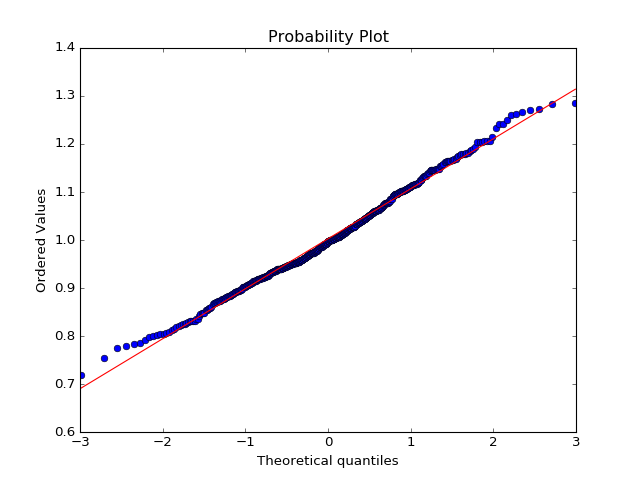

In [9]:
plt.figure()
out = stats.probplot(mn[:,2],dist='norm',plot=plt)

plt.figure()
out = stats.probplot(mn[:,99],dist='norm',plot=plt)